# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [6]:
!pip3 install seaborn

/bin/sh: pip3: command not found


### And here we read in the data

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('2016-Q1-Trips-History-Data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [23]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour_of_day
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,23.98
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,23.98
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,23.95
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,23.95


### Aggregate to get a count per hour/minute of the day across all trips

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,hour
hour_of_day,,,,,,,,,,,,
0.00,70,70,70,70,70,70,70,70,70,70,70,0.00
0.02,90,90,90,90,90,90,90,90,90,90,90,0.02
0.03,71,71,71,71,71,71,71,71,71,71,71,0.03
0.05,77,77,77,77,77,77,77,77,77,77,77,0.05
0.07,68,68,68,68,68,68,68,68,68,68,68,0.07


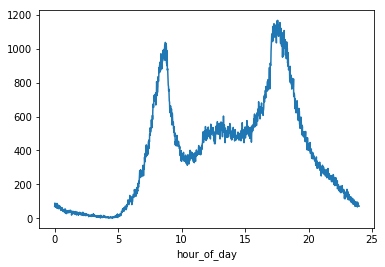

In [25]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
hours.head()
# import seaborn as sns

# sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

In [26]:
type(hours)

pandas.core.frame.DataFrame

In [32]:
hours.index

Float64Index([  0.0,  0.02,  0.03,  0.05,  0.07,  0.08,   0.1,  0.12,  0.13,
               0.15,
              ...
              23.83, 23.85, 23.87, 23.88,  23.9, 23.92, 23.93, 23.95, 23.97,
              23.98],
             dtype='float64', name='hour_of_day', length=1440)

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

In [182]:
from sklearn import linear_model

In [183]:
x = hours['hour']
y = hours['start']
x = x.as_matrix()
y = y.as_matrix()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [184]:
x = x.reshape(-1, 1)

In [185]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([18.51119838]), 161.63029612344457)

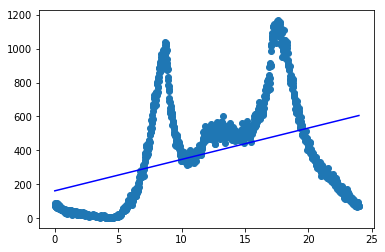

In [186]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')

# Q1: First Model

In [187]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

x_2 = poly.fit_transform(x.reshape(-1, 1))

In [188]:
linear = linear_model.LinearRegression()

linear.fit(x_2, y)

(linear.coef_, linear.intercept_)

(array([  0.        , 120.27638582,  -4.24316279]), -244.8652166790016)

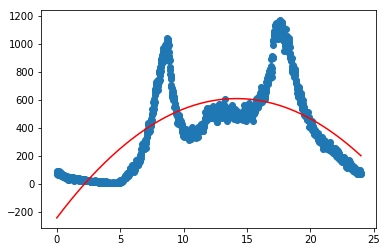

In [189]:
import numpy as np
plt.scatter(x,y)
plt.plot(x, np.dot(x_2, linear.coef_) + linear.intercept_, c='r')

# Q2: Second Model

In [190]:
poly = PolynomialFeatures(degree=6)
x_6 = poly.fit_transform(x.reshape(-1, 1))

In [191]:
linear = linear_model.LinearRegression()

linear.fit(x_6, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00, -6.02878099e+02,  2.45273109e+02, -3.79705173e+01,
         2.81845263e+00, -9.95948305e-02,  1.33842338e-03]), 365.9106213906091)

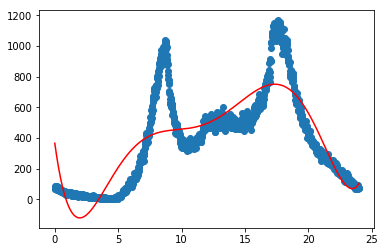

In [192]:
import numpy as np
plt.scatter(x,y)
plt.plot(x, np.dot(x_6, linear.coef_) + linear.intercept_, c='r')

# Q3: Third Model

In [264]:
poly = PolynomialFeatures(degree=10)
x_10 = poly.fit_transform(x.reshape(-1, 1))

In [265]:
linear = linear_model.LinearRegression()

linear.fit(x_10, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00, -4.34148897e+02,  5.70156390e+02, -3.16063157e+02,
         8.69076506e+01, -1.31665590e+01,  1.17464061e+00, -6.32427290e-02,
         2.01679833e-03, -3.50012055e-05,  2.54055799e-07]),
 136.37110098923245)

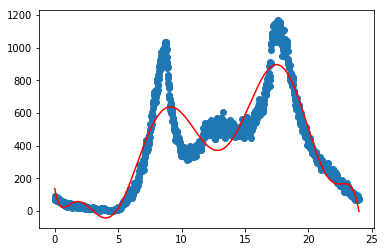

In [266]:
import numpy as np
plt.scatter(x,y)
plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='r')

I recommend the third model. While this linear model still does not have a perfect fit, it is a better fit than the previous two models (and other models I tried with varying polynomial degrees).

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


# Q2: First Model

In [267]:
ridge1 = linear_model.Ridge(alpha=.5)

ridge1.fit(x_10, y)

(ridge1.coef_, ridge1.intercept_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.114926e-30
  overwrite_a=True).T


(array([ 0.00000000e+00, -2.17972602e+02,  3.61470465e+02, -2.26481743e+02,
         6.60022636e+01, -1.02483870e+01,  9.19980043e-01, -4.92315685e-02,
         1.54464820e-03, -2.61032031e-05,  1.82232401e-07]), 78.28292455623546)

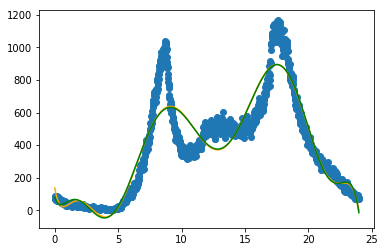

In [268]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='orange')
plt.plot(x, np.dot(x_10, ridge1.coef_) + ridge1.intercept_, c='green')

# Q2: Second Model

In [269]:
ridge2 = linear_model.Ridge(alpha=20)

ridge2.fit(x_10, y)

(ridge2.coef_, ridge2.intercept_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.459705e-29
  overwrite_a=True).T


(array([ 0.00000000e+00,  4.17506128e+01,  4.95764307e+01, -7.55936523e+01,
         2.80030042e+01, -4.65530430e+00,  4.12412840e-01, -2.04521483e-02,
         5.51365518e-04, -7.01618736e-06,  2.56549927e-08]), 38.77931902284422)

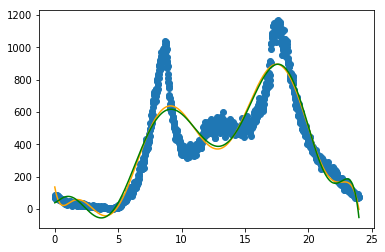

In [270]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='orange')
plt.plot(x, np.dot(x_10, ridge2.coef_) + ridge2.intercept_, c='green')

# Q3: Third Model

In [271]:
ridge3 = linear_model.Ridge(alpha=100)

ridge3.fit(x_10, y)

(ridge3.coef_, ridge3.intercept_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.229853e-28
  overwrite_a=True).T


(array([ 0.00000000e+00,  1.68466978e+01,  7.87065684e+00, -3.88470711e+01,
         1.62643748e+01, -2.68298375e+00,  2.17474666e-01, -8.71568465e-03,
         1.27820767e-04,  1.40867420e-06, -4.53886792e-08]), 77.03403445106619)

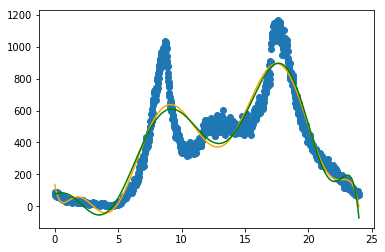

In [272]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='orange')
plt.plot(x, np.dot(x_10, ridge3.coef_) + ridge3.intercept_, c='green')

Out of these three models, I recommend the first model where alpha = 0.5. It's similar to the linear model, but it has the best fit out of the three. As the alpha increases, the model's accuracy decreases, especially as the x values increase.  